In [1]:
# K-Means Clustering

# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [5]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:,[3,4]].values
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


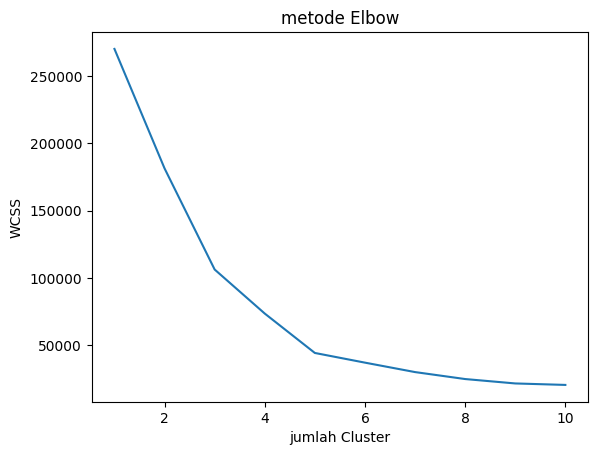

In [9]:
#Menggunakan metode elbow untuk menemukan jumlah cluster yang optimal

from sklearn.cluster import KMeans
WCSS =[]
for i in range (1,11):
  kmeans = KMeans(n_clusters =i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
  kmeans.fit(X)
  WCSS.append(kmeans.inertia_)

# plot grafik untuk menvisualisasikan Metode Elbow untuk menemukan jumlah cluster yang optimal
# WCSS is the sum of squared distance between each point and the centroid in a cluster.
# WCSS adalah jumlah kuadrat jarak antara setiap titik dan pusat massa dalam sebuah cluster.
plt.plot(range(1,11),WCSS)
plt.title('metode Elbow')
plt.xlabel('jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

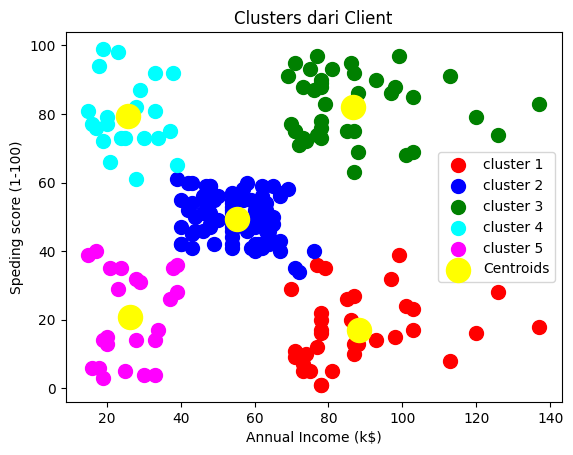

In [10]:
# Menerapkan KMeans ke dataset dengan jumlah cluster optimal

kmeans=KMeans(n_clusters= 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

#Visualising the clusters

plt.scatter(X[y_kmeans == 0,0], X[y_kmeans ==0,1],s = 100, c='red', label = 'cluster 1')

plt.scatter(X[y_kmeans == 1,0], X[y_kmeans ==1,1],s = 100, c='blue', label = 'cluster 2')

plt.scatter(X[y_kmeans == 2,0], X[y_kmeans ==2,1],s = 100, c='green', label = 'cluster 3')

plt.scatter(X[y_kmeans == 3,0], X[y_kmeans ==3,1],s = 100, c='cyan', label = 'cluster 4')

plt.scatter(X[y_kmeans == 4,0], X[y_kmeans ==4,1],s = 100, c='magenta', label = 'cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters dari Client')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Speding score (1-100)')
plt.legend()
plt.show()